In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [4]:
df = pd.read_excel('./src/USDA_National_Nutrient_DataBase.xlsx')
df.tail()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.0,...,7.8,7.148,8.320,6.210,95.0,80.0,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.0,...,0.0,0.218,0.082,0.222,41.0,85.0,3 oz,NaN,NaN,0.0
8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.2,...,0.0,0.000,0.000,0.000,0.0,21.0,1 serving,NaN,NaN,0.0
8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.0,...,0.1,0.361,0.259,0.252,50.0,85.0,3 oz,NaN,NaN,0.0
8789,93600,"TURTLE,GREEN,RAW",78.50,89,19.80,0.50,1.20,0.00,0.0,0.0,...,0.1,0.127,0.088,0.170,50.0,85.0,3 oz,NaN,NaN,0.0


In [5]:
df = df.set_index('NDB_No')
df.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
NDB_No,,,,,,,,,,,,,,,,,,,,,
1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [6]:
print(df.shape)
display(df.describe())

(8790, 52)


,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
count,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,8646.000000,...,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000
mean,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,2.699674,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416
std,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,5.687560,...,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000
25%,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,0.540000,...,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000
50%,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,1.380000,...,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000
75%,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,2.600000,...,0.200000,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000
max,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,123.600000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 1001 to 93600
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shrt_Desc          8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7

In [37]:
for i, el in enumerate(df.dtypes):
    if el == 'object':
        print(f"{df.columns[i] :-<5} {el}")

Shrt_Desc object
GmWt_Desc1 object
GmWt_Desc2 object


In [38]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Shrt_Desc----------------------------------------- ['BUTTER,WITH SALT' 'BUTTER,WHIPPED,W/ SALT' 'BUTTER OIL,ANHYDROUS' ...
 'SYRUP,CANE' 'SNAIL,RAW' 'TURTLE,GREEN,RAW']
GmWt_Desc1---------------------------------------- ['1 pat,  (1" sq, 1/3" high)' '1 tbsp' '1 oz' '1 cup, diced' '4 oz'
 '1 cup,  (not packed)' '1 cup, crumbled' '1 cup' '1 cup, shredded'
 '.5 cup' '1 fl oz' '1 cup,  whipped' '1 serving'
 '1 container,  individual' '1.5 oz' '.25 cup' '1 container,  (6 oz)'
 '1 large' '1 cup, chopped' '1 cup,  sifted' '1 egg' '.35 oz' '2 tbsp'
 '1 tablespoon' '1 slice' '4 tsp' '1 slice,  3/4 oz' '2 scoop'
 '1 cup, grated' '1 container' '1 bar' '1 unit' '1 can'
 '.25 cup, shredded' '1 slice,  (2/3 oz)' '1 piece' '1 medium' '26 pieces'
 '2 tsp' '5.3 oz' '1 container,  (5.3 oz)' '1 container,  (7 oz)' nan
 '1 cup,  (8 fl oz)' '1 tsp' '1 tsp, whole' '1 tsp, leaves'
 '1 tsp, crumbled' '1 tsp, ground' '5 leaves' '5 sprigs'
 '1 tsp,  or 1 packet' '1 tbsp,  drained' '2 leaves'
 '2 tbsp,  (1 servi

In [45]:
df.duplicated().value_counts()

False    8790
dtype: int64

### Analyse des données manquantes

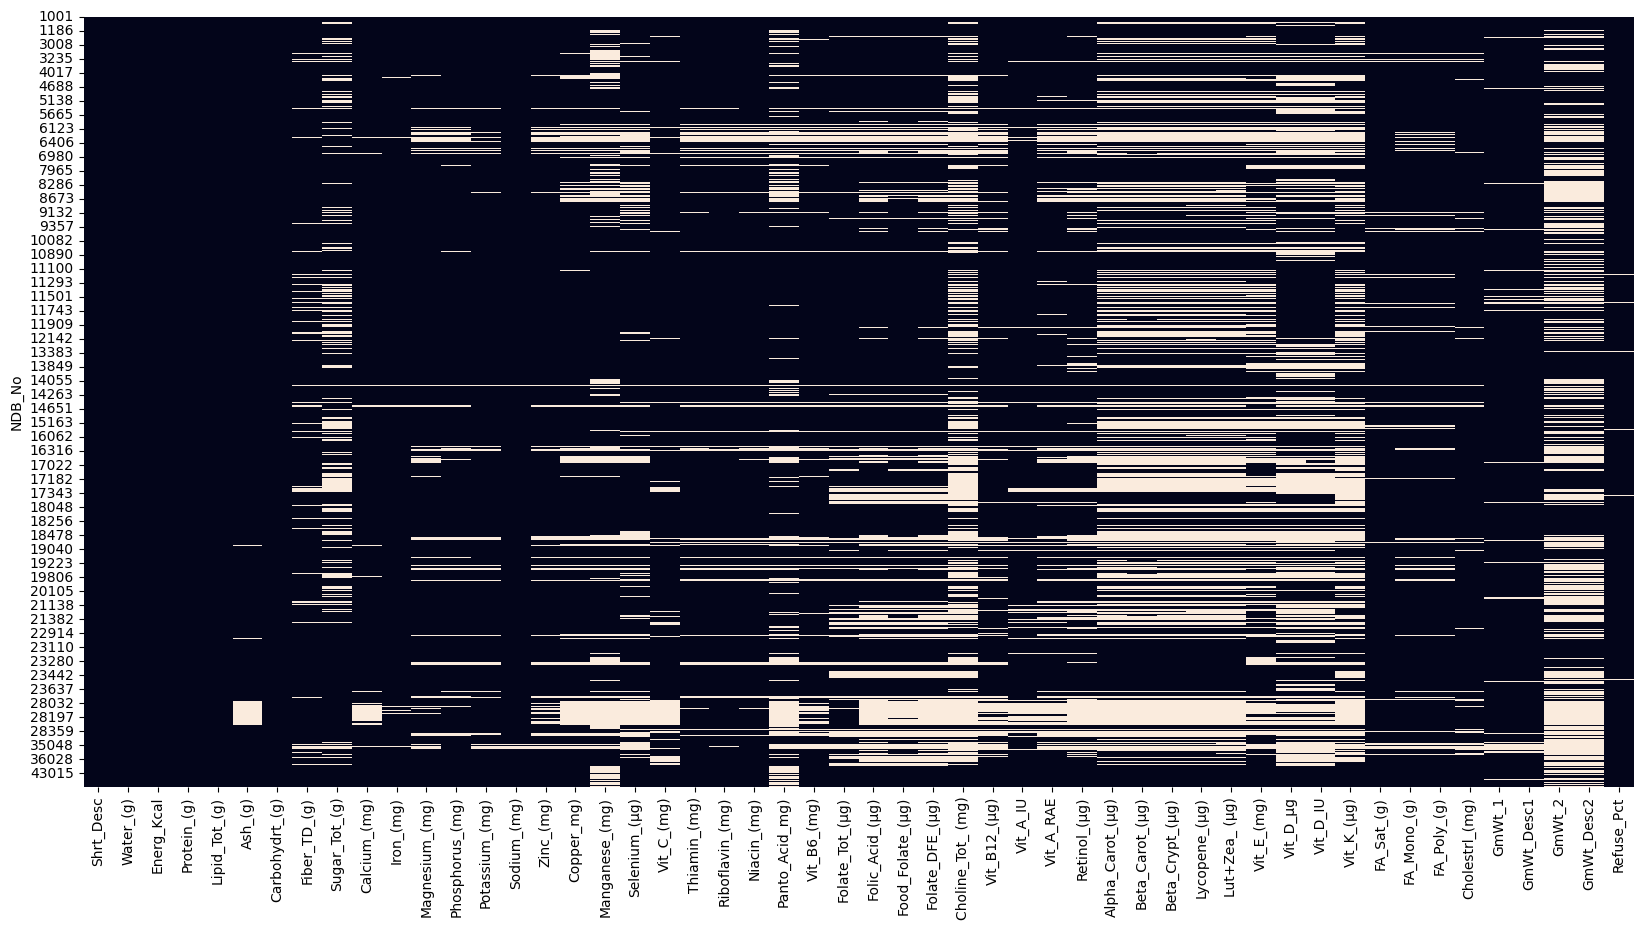

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

<Axes: >

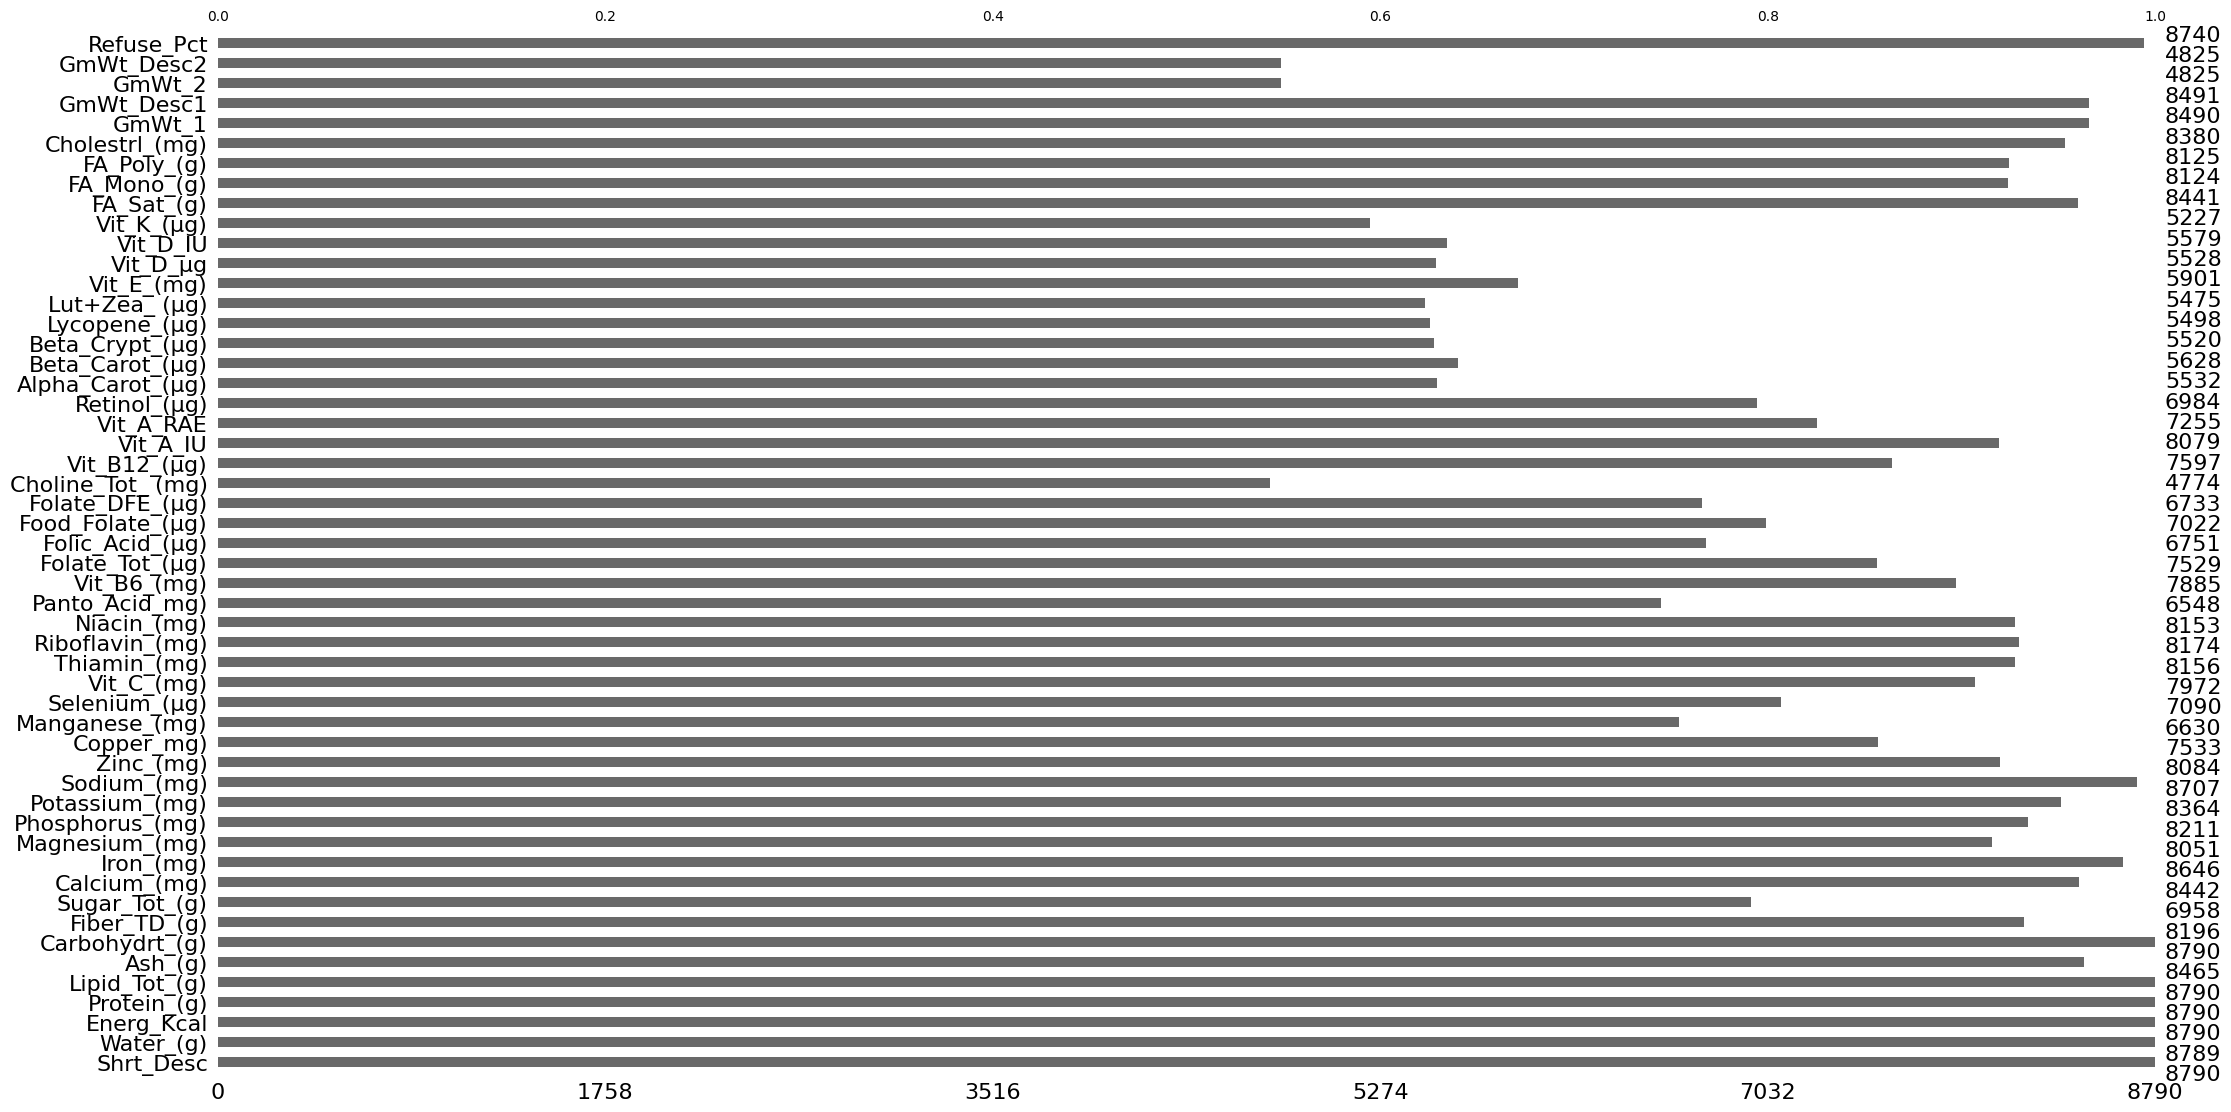

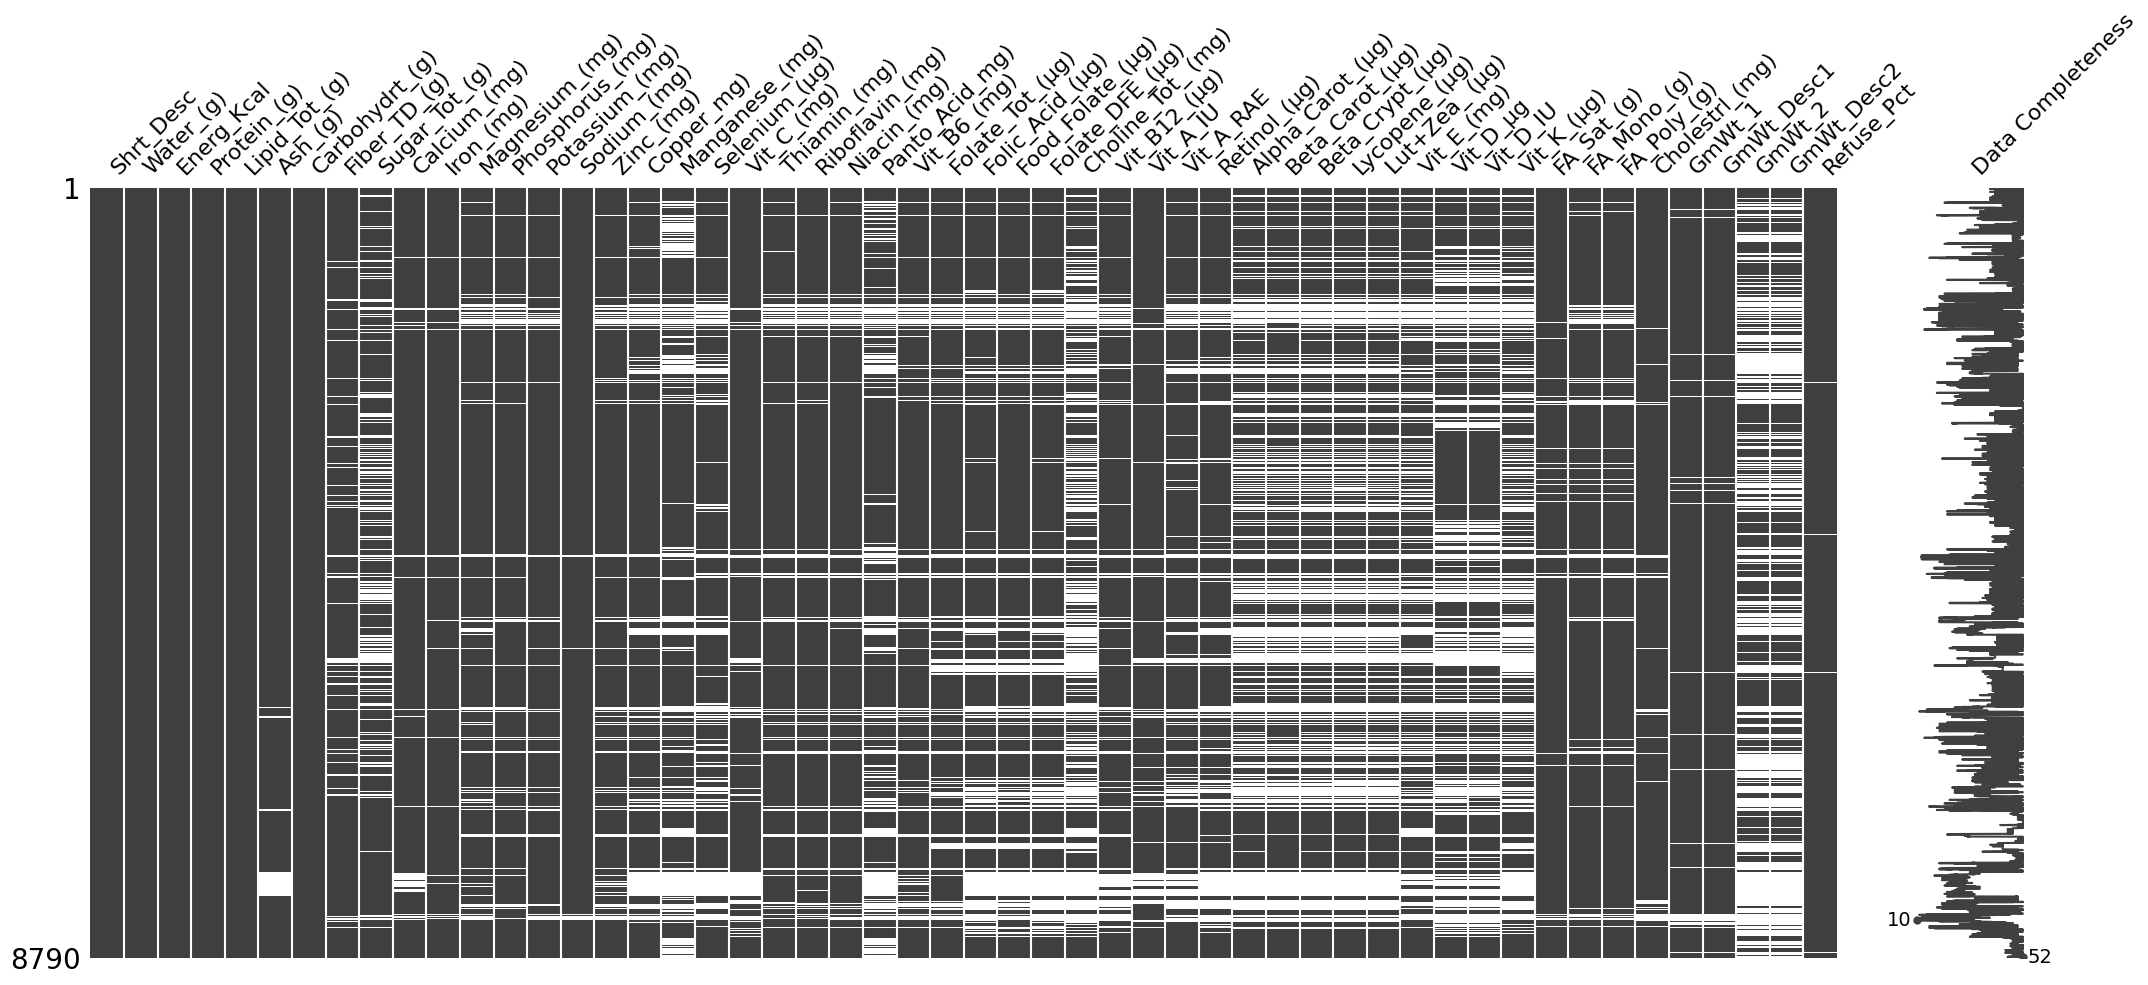

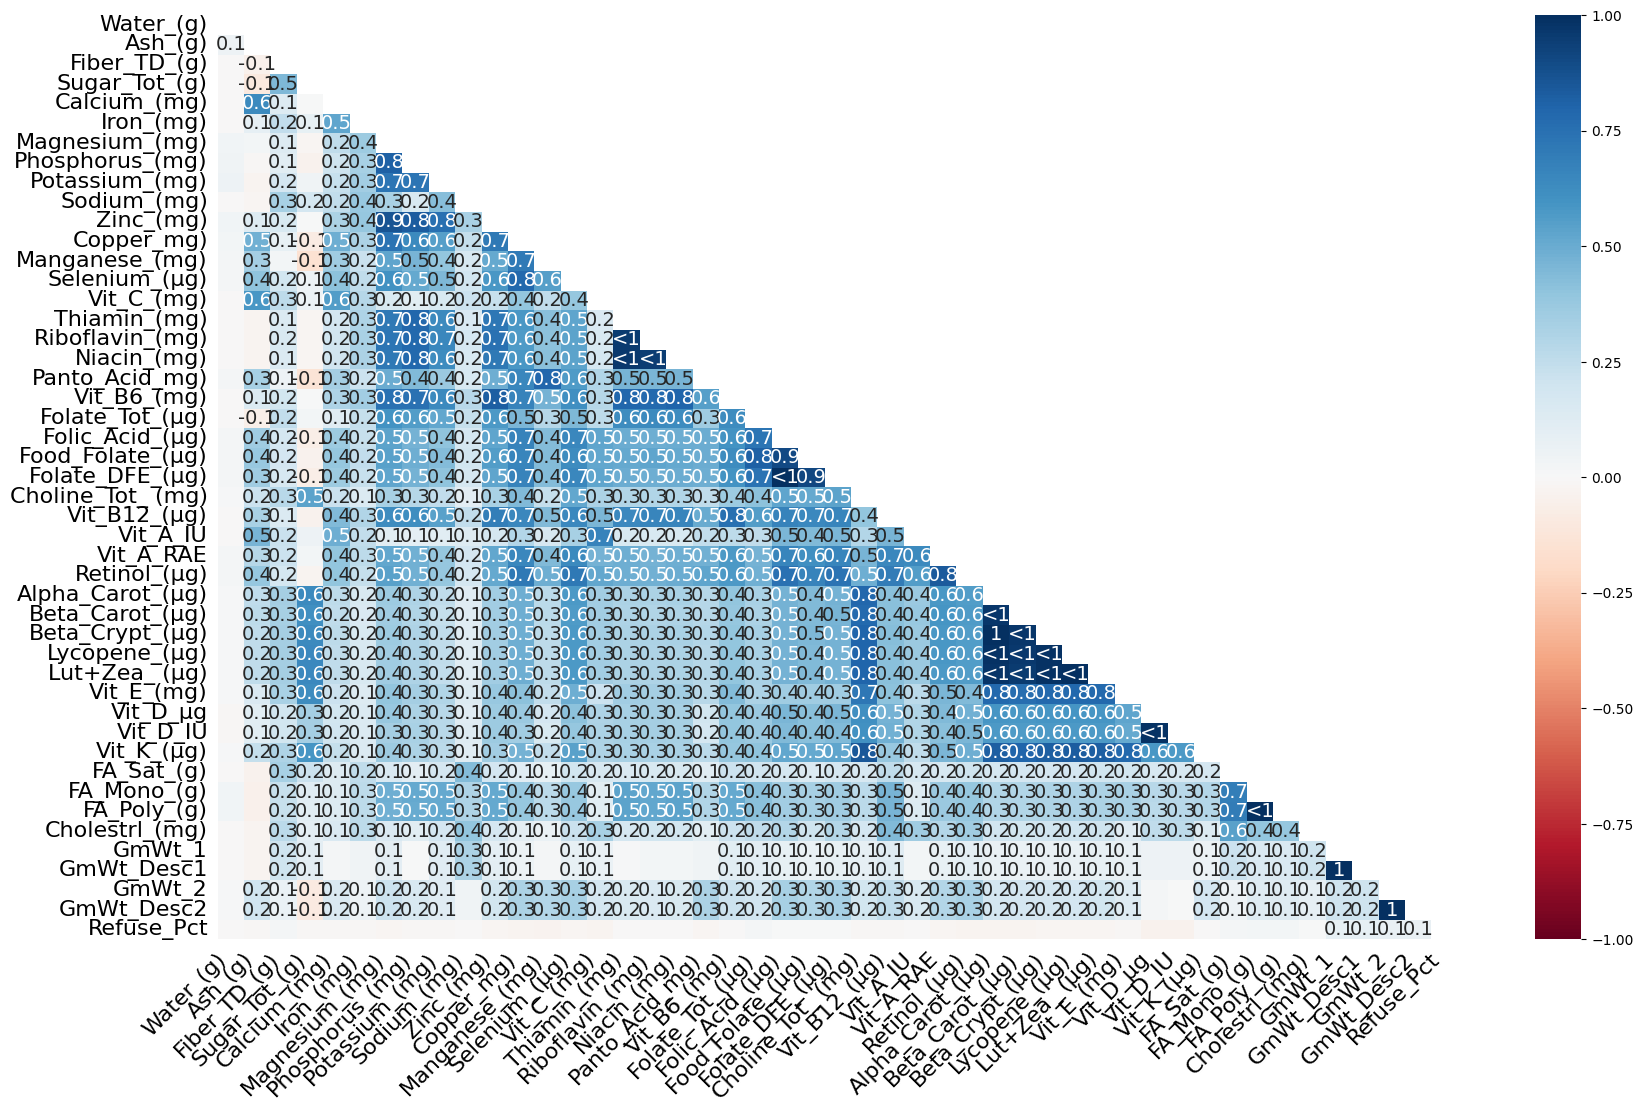

In [46]:
import missingno as msno

msno.bar(df)
msno.matrix(df, labels=True)
msno.heatmap(df)

In [56]:
# Valeurs manquantes pour chaque variable
missing_values = df.isnull().sum()

# Proportion de valeurs manquantes pour chaque variable
missing_proportions = round(missing_values / len(df) * 100, 2)

# Dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes (%)']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes (%)', ascending=False)
missing_df[:30]

,Nombre de valeurs manquantes,Proportion de valeurs manquantes (%)
Choline_Tot_ (mg),4016,45.69
GmWt_Desc2,3965,45.11
GmWt_2,3965,45.11
Vit_K_(µg),3563,40.53
Lut+Zea_ (µg),3315,37.71
Lycopene_(µg),3292,37.45
Beta_Crypt_(µg),3270,37.20
Vit_D_µg,3262,37.11
Alpha_Carot_(µg),3258,37.06
Vit_D_IU,3211,36.53


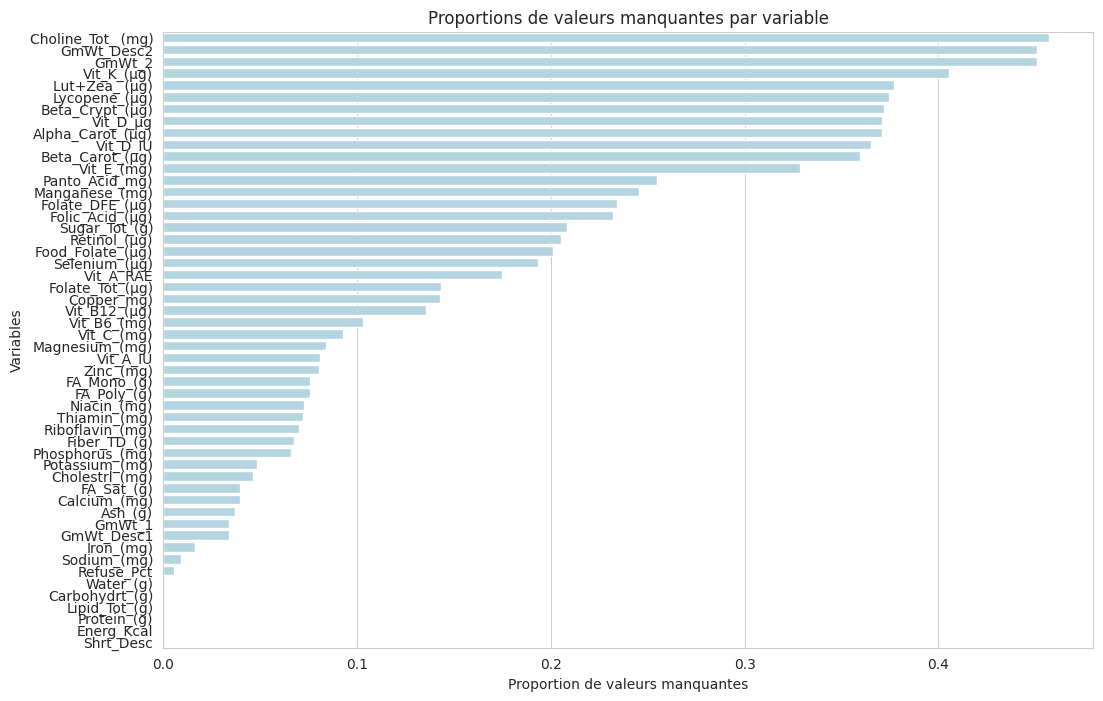

In [79]:
# Proportion de valeurs manquantes pour chaque variable
missing_proportions = df.isnull().mean().sort_values(ascending=False)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=missing_proportions.values ,y=missing_proportions.index, ax=ax, color='lightblue')
ax.set_xlabel('Proportion de valeurs manquantes')
ax.set_ylabel('Variables')
ax.set_title('Proportions de valeurs manquantes par variable')
plt.show()

On ne va garder que les variables avec moins de 20% de valeurs manquantes

In [80]:
df_without_missing_val = df[df.columns[(df.isna().sum() / len(df) < 0.20)]]
df2 = df_without_missing_val.copy()

In [87]:
# Proportion de valeurs manquantes < 20% du dataset d'origine
missing_prop = df2.isna().mean().reset_index()

# Renommage des colonnes
missing_prop.columns = ['variable', 'missing_prop']

# Tri par ordre décroissant de la proportion de valeurs manquantes
missing_prop = missing_prop.sort_values('missing_prop', ascending=False)
print(missing_prop)

           variable  missing_prop
16    Selenium_(µg)      0.193402
25        Vit_A_RAE      0.174630
22  Folate_Tot_(µg)      0.143458
15       Copper_mg)      0.143003
23     Vit_B12_(µg)      0.135722
21      Vit_B6_(mg)      0.102958
17       Vit_C_(mg)      0.093060
10   Magnesium_(mg)      0.084073
24         Vit_A_IU      0.080887
14        Zinc_(mg)      0.080319
27      FA_Mono_(g)      0.075768
28      FA_Poly_(g)      0.075654
20      Niacin_(mg)      0.072469
18     Thiamin_(mg)      0.072127
19  Riboflavin_(mg)      0.070080
7      Fiber_TD_(g)      0.067577
11  Phosphorus_(mg)      0.065870
12   Potassium_(mg)      0.048464
29   Cholestrl_(mg)      0.046644
26       FA_Sat_(g)      0.039704
8      Calcium_(mg)      0.039590
5           Ash_(g)      0.036974
30           GmWt_1      0.034130
31       GmWt_Desc1      0.034016
9         Iron_(mg)      0.016382
13      Sodium_(mg)      0.009443
32       Refuse_Pct      0.005688
1         Water_(g)      0.000114
6    Carbohydr

In [91]:
keep_vars=['Shrt_Desc','Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)','Fiber_TD_(g)',
           'Calcium_(mg)','Iron_(mg)','Sodium_(mg)','Water_(g)','Magnesium_(mg)','Phosphorus_(mg)',
           'Vit_C_(mg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)']

In [94]:
missing_prop.variable.values

array(['Selenium_(µg)', 'Vit_A_RAE', 'Folate_Tot_(µg)', 'Copper_mg)',
       'Vit_B12_(µg)', 'Vit_B6_(mg)', 'Vit_C_(mg)', 'Magnesium_(mg)',
       'Vit_A_IU', 'Zinc_(mg)', 'FA_Mono_(g)', 'FA_Poly_(g)',
       'Niacin_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Fiber_TD_(g)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Cholestrl_(mg)',
       'FA_Sat_(g)', 'Calcium_(mg)', 'Ash_(g)', 'GmWt_1', 'GmWt_Desc1',
       'Iron_(mg)', 'Sodium_(mg)', 'Refuse_Pct', 'Water_(g)',
       'Carbohydrt_(g)', 'Lipid_Tot_(g)', 'Protein_(g)', 'Energ_Kcal',
       'Shrt_Desc'], dtype=object)

In [97]:
for el in missing_prop.variable.values:
    if el in keep_vars:
        print(el)

Vit_C_(mg)
Magnesium_(mg)
FA_Mono_(g)
FA_Poly_(g)
Fiber_TD_(g)
Phosphorus_(mg)
FA_Sat_(g)
Calcium_(mg)
Iron_(mg)
Sodium_(mg)
Water_(g)
Carbohydrt_(g)
Lipid_Tot_(g)
Protein_(g)
Energ_Kcal
Shrt_Desc


* **`Refuse_Pct`** :  pourcentage de déchets de l'aliment (ex: os, peau, graines)
* **`GmWt_Desc1`** :  description de la portion de référence  de l'aliment.
* **`GmWt_1`**     :  poids (en grammes) d'une portion de référence de l'aliment.